In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_motion_CoM_continuous
%store -r Y_motion_CoM_continuous
print(X_motion_CoM_continuous.shape)
print(Y_motion_CoM_continuous.shape)

(10027, 28)
(10027, 2)


In [6]:
X_motion_CoM_continuous[0]

array([0.10000000149011612, 0.0, 0.0, 0.06422444087825316,
       0.12709958334894797, 0.02129841568653252, 0.032841687967686085,
       0.007458737822045343, -0.018058522863240344, 0.2349003268785842,
       0.18683081039427935, -0.40515855604189455, 0.23261810624015347,
       -0.20303246525516214, -0.4050806504096208, -0.26129141850751325,
       0.13343324739617787, -0.40023590712089907, -0.2499161232198911,
       -0.15232611895506265, -0.4005353553555561, False, True, True,
       False, 0.10000000149011612, 0.0, 0.0], dtype=object)

In [7]:
Y_motion_CoM_continuous[0]

array([0.017403092379263185, -0.02304735349003534], dtype=object)

# Multivariate Linear Regression (CoM Prediction)

In [8]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
idx_fr_rl_swinging = np.where(X_motion_CoM_continuous[:, 22] == 1)[0]
X_motion_CoM_continuous_FR_RL = X_motion_CoM_continuous[idx_fr_rl_swinging]
Y_motion_CoM_continuous_FR_RL = Y_motion_CoM_continuous[idx_fr_rl_swinging]
print(X_motion_CoM_continuous_FR_RL.shape)
print(Y_motion_CoM_continuous_FR_RL.shape)

(5022, 28)
(5022, 2)


## Predict CoM (x) movement

In [10]:
X_motion_CoM_continuous_FR_RL[0, :]

array([0.10000000149011612, 0.0, 0.0, 0.06422444087825316,
       0.12709958334894797, 0.02129841568653252, 0.032841687967686085,
       0.007458737822045343, -0.018058522863240344, 0.2349003268785842,
       0.18683081039427935, -0.40515855604189455, 0.23261810624015347,
       -0.20303246525516214, -0.4050806504096208, -0.26129141850751325,
       0.13343324739617787, -0.40023590712089907, -0.2499161232198911,
       -0.15232611895506265, -0.4005353553555561, False, True, True,
       False, 0.10000000149011612, 0.0, 0.0], dtype=object)

In [11]:
Y_motion_CoM_continuous_FR_RL[0, :]

array([0.017403092379263185, -0.02304735349003534], dtype=object)

### Linear Regression

In [14]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 3:9],
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20]))
               
# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_com_x = LinearRegression()

# Fit the model
model_fr_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9973271478014408
RMSE:  0.002204158560314149
The lowest error is:  1.4382453755942826e-06
The highest error is:  0.020608234069638867
The avg. error is:  0.001302137536971804


In [15]:
model_fr_com_x.coef_

array([[ 1.67703889e-01, -4.57877553e-02, -9.52577939e-02,
         1.83052067e-04, -2.31385764e-03,  7.61571999e-02,
         3.56845376e-03, -3.63856299e-03,  1.30516849e-01,
        -7.53428691e-02,  4.18659096e-01,  2.35614874e-01,
         6.96479953e-02,  1.80526670e-01,  1.37323753e-02,
         1.57726113e-01,  1.30269533e-01]])

In [16]:
model_fr_com_x.intercept_

array([0.0045297])

Text(0, 0.5, 'Predictions')

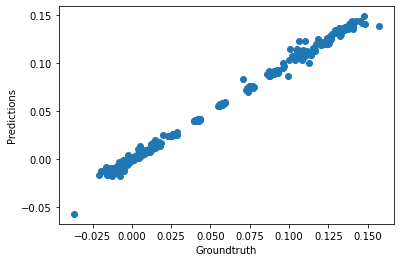

In [17]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [26]:
#%store model_fr_com_x

In [27]:
#for idx, prediction in enumerate(predictions):
#    print(f'Command: {X_test[idx, :3]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [28]:
# Save model
#joblib.dump(model_fr_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_x.sav")

## Predict CoM -> y

### Linear Regression

In [19]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 3:9],
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20]))

# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_com_y = LinearRegression()

# Fit the model
model_fr_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9939649787177279
RMSE:  0.002656581131349929
The lowest error is:  2.3617530048661295e-07
The highest error is:  0.021841188426957724
The avg. error is:  0.001578154945951455


In [20]:
model_fr_com_y.coef_

array([[-0.02743412,  0.20984167,  0.14934019, -0.00067403, -0.00179722,
        -0.11849514, -0.00245629,  0.03057901, -0.18730101,  0.26729459,
        -0.3715912 ,  0.05218765,  0.12329882,  0.05822368,  0.24019054,
         0.06380863, -0.00982783]])

In [21]:
model_fr_com_y.intercept_

array([-0.00276858])

Text(0, 0.5, 'Predictions')

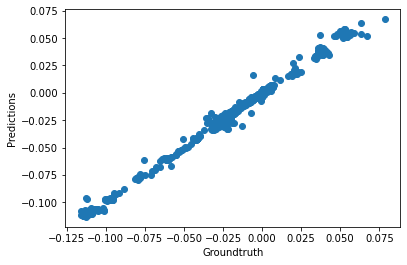

In [22]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [47]:
#%store model_fr_com_y

In [48]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [29]:
# Save model
#joblib.dump(model_fr_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_y.sav")